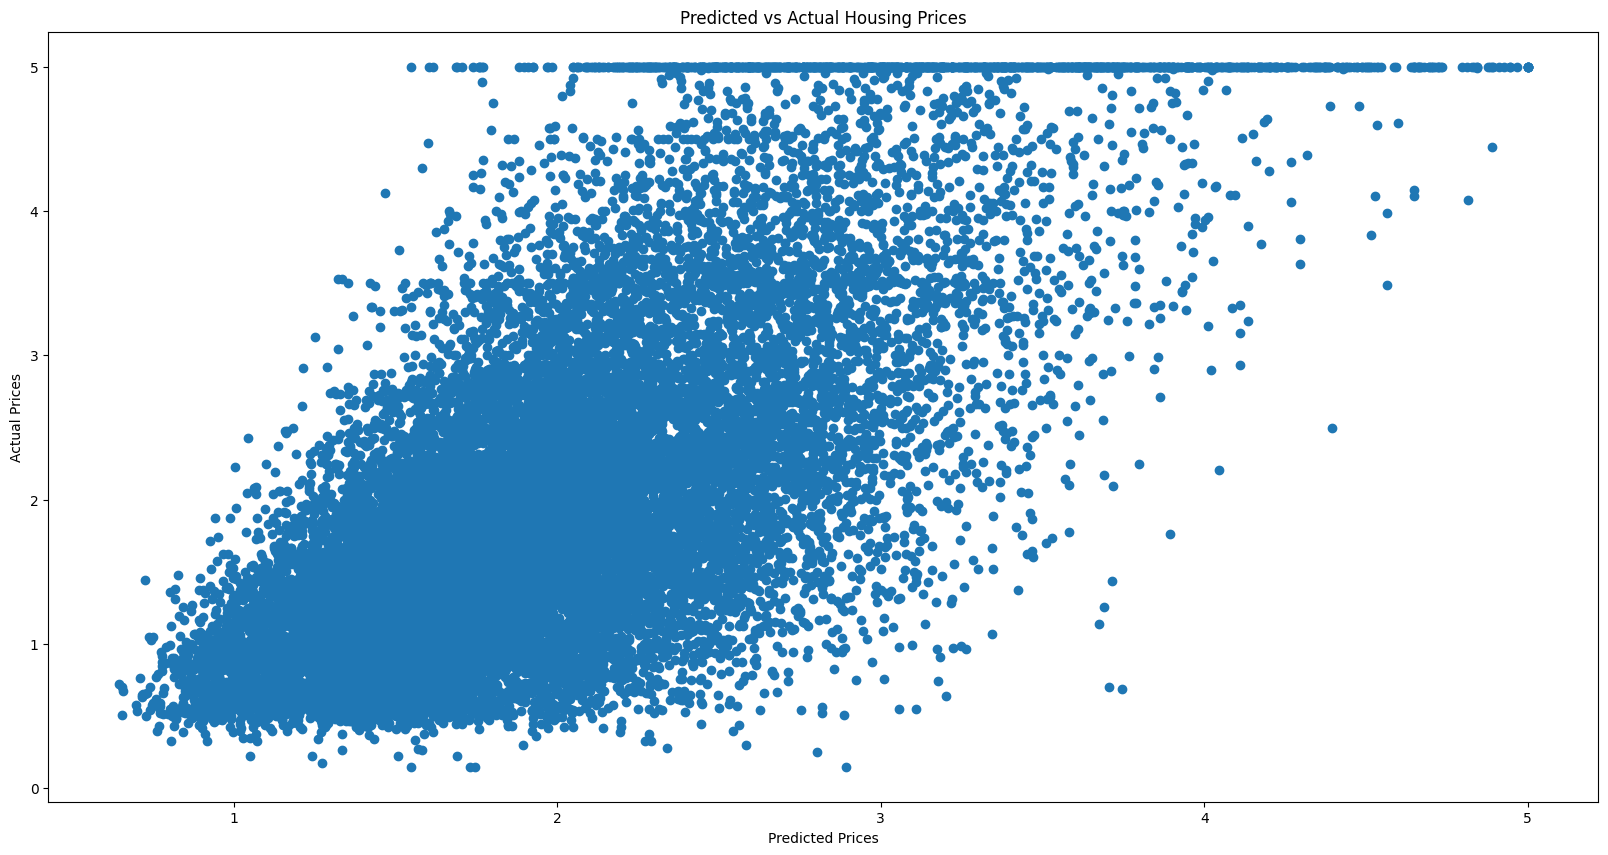

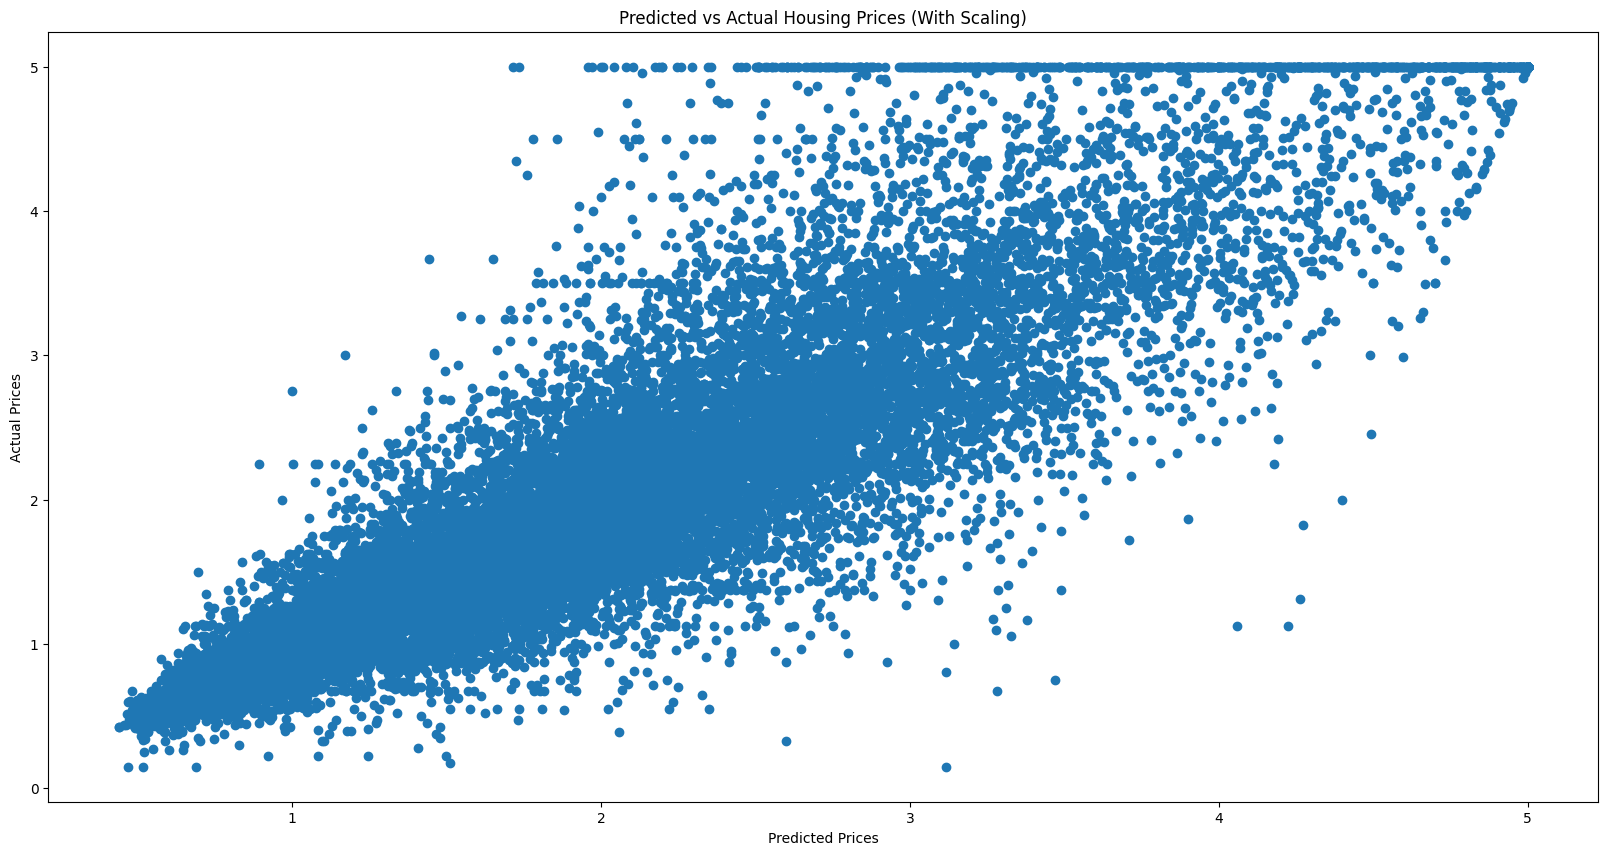

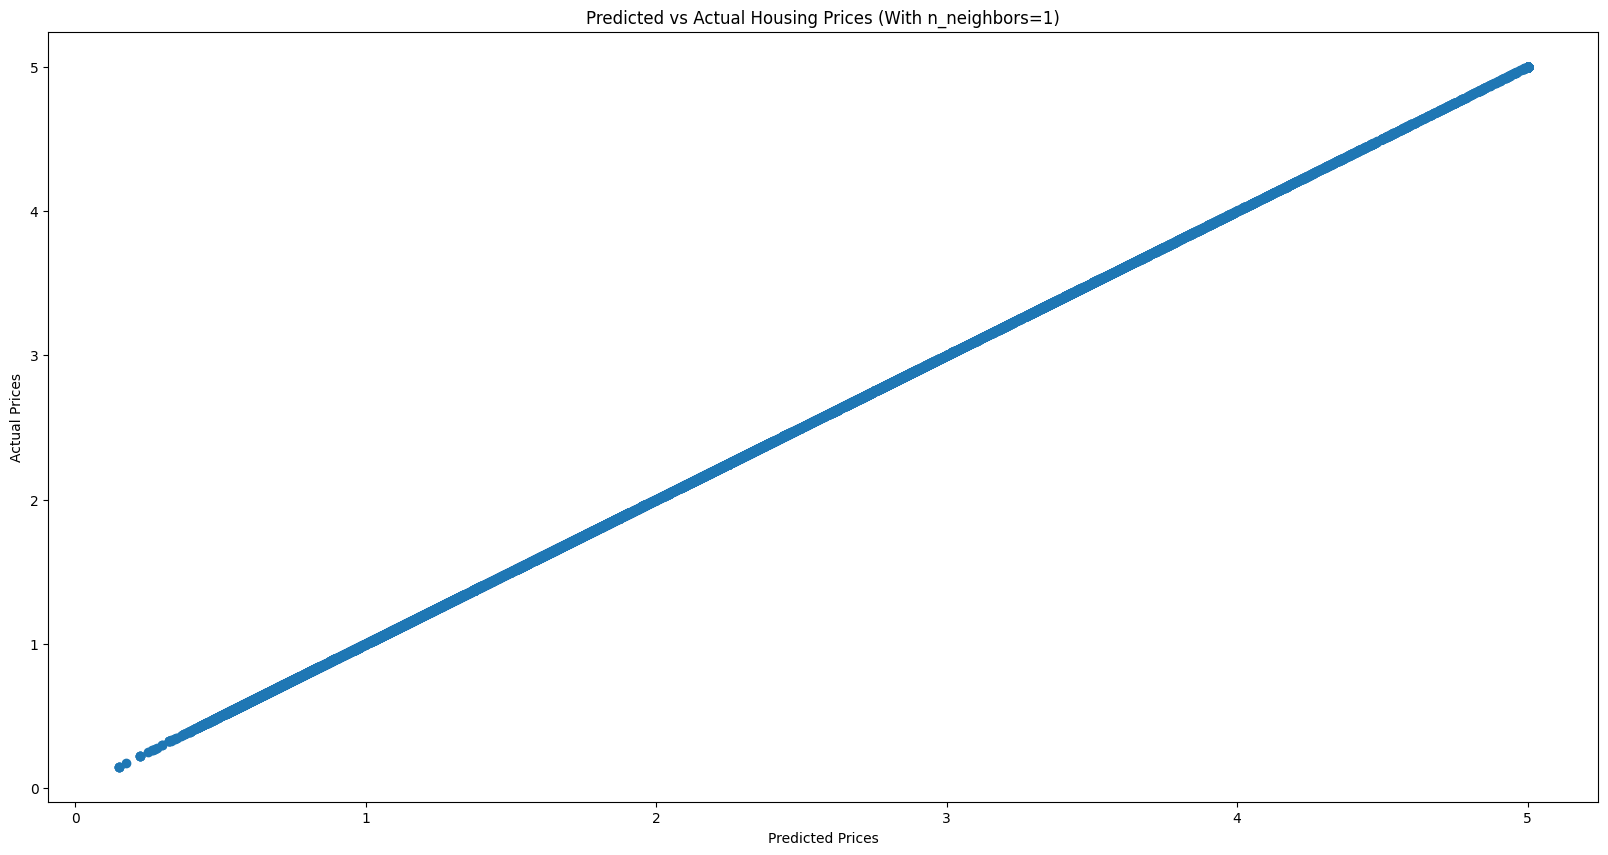

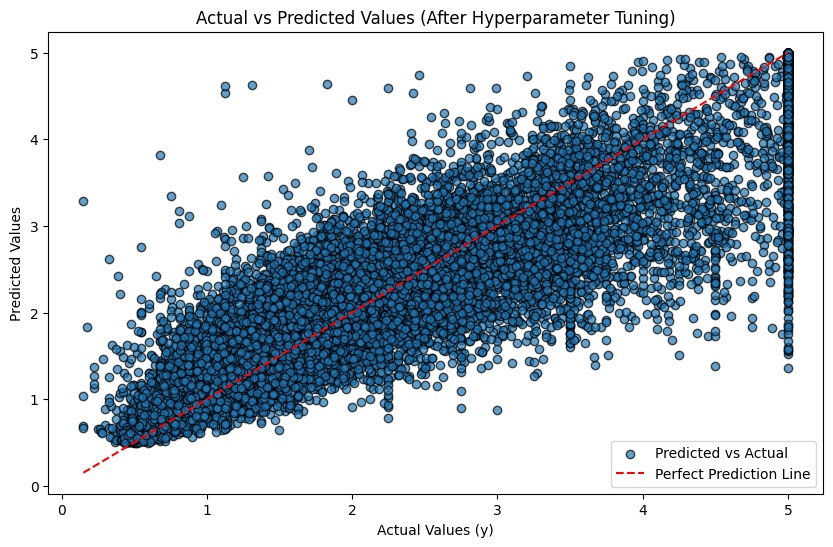

[4.784107 4.326802 4.355605 3.964403 2.3627   2.785801 3.154801 2.3885
 1.2569   3.084   ]
   Actual  Predicted
0   4.526   4.784107
1   3.585   4.326802
2   3.521   4.355605
3   3.413   3.964403
4   3.422   2.362700
5   2.697   2.785801
6   2.992   3.154801
7   2.414   2.388500
8   2.267   1.256900
9   2.611   3.084000


In [1]:
#Importing necessary libraries
from sklearn.datasets import fetch_california_housing  # For loading the California housing dataset
from sklearn.neighbors import KNeighborsRegressor  # For the KNN regressor model
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.preprocessing import StandardScaler  # For scaling the features
from sklearn.pipeline import Pipeline  # For creating a pipeline to chain steps
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning
import pandas as pd  # For working with DataFrames

# Fetching the California housing dataset
X, y = fetch_california_housing(return_X_y=True)

# Creating and fitting a K-Nearest Neighbors model
mod = KNeighborsRegressor().fit(X, y)  # Train the model
pred = mod.predict(X)  # Make predictions

# Graph for showing the predicted vs actual values
plt.figure(figsize=(20, 10))
plt.scatter(pred, y)  # Scatter plot of predictions vs actual values
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.title('Predicted vs Actual Housing Prices')
plt.show()

# Create a pipeline that includes feature scaling and KNN regression
pipe = Pipeline([
    ("scale", StandardScaler()),  # Step to scale the features
    ("model", KNeighborsRegressor())  # Step to apply KNN regression
])

# Fit the pipeline to the data
pipe.fit(X, y)

# Predict the values using the model in the pipeline
pred = pipe.predict(X)

# Graph for showing the predicted vs actual values using pipeline scaling
plt.figure(figsize=(20, 10))
plt.scatter(pred, y)  # Scatter plot of predictions vs actual values
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.title('Predicted vs Actual Housing Prices (With Scaling)')
plt.show()

# Using a KNN model with n_neighbors=1, which can lead to overfitting
pipe = Pipeline([
    ("scale", StandardScaler()),  # Scaling features
    ("model", KNeighborsRegressor(n_neighbors=1))  # Setting n_neighbors to 1
])

pipe.fit(X, y)  # Fit the model with n_neighbors=1
pred = pipe.predict(X)  # Make predictions

# Scatter plot to show predictions vs actual with n_neighbors=1
plt.figure(figsize=(20, 10))
plt.scatter(pred, y)
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.title('Predicted vs Actual Housing Prices (With n_neighbors=1)')
plt.show()

# Using GridSearchCV to tune the hyperparameter 'n_neighbors' to find the best value
mod = GridSearchCV(estimator=pipe,
                   param_grid={"model__n_neighbors": [1, 2, 3, 4, 5, 7, 8, 9, 10]},  # Testing different values for n_neighbors
                   cv=3)  # Using 3-fold cross-validation
mod.fit(X, y)  # Fit the model to the data

# Displaying the results of the grid search
pd.DataFrame(mod.cv_results_)

# Get the best model from GridSearchCV and make predictions
pred = mod.predict(X)

# Scatter plot comparing the predicted and actual values
plt.figure(figsize=(10, 6))
plt.scatter(y, pred, alpha=0.7, edgecolors='k', label="Predicted vs Actual")  # Scatter plot
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label="Perfect Prediction Line")  # Perfect prediction line
plt.title("Actual vs Predicted Values (After Hyperparameter Tuning)")
plt.xlabel("Actual Values (y)")
plt.ylabel("Predicted Values")
plt.legend()  # Adding the legend
plt.show()

# Displaying the first few predicted values
print(pred[:10])  # Show the first 10 predicted prices

# Alternatively, creating a DataFrame to view actual vs predicted values side by side
predictions_df = pd.DataFrame({"Actual": y, "Predicted": pred})
print(predictions_df.head(10))  # Display the first 10 actual vs predicted values
